In [1]:
# from google.colab import drive
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# drive.mount('/content/drive')

# Load the data and check the first few lines
file_path = "TMDB_movie_dataset_cleaned.csv" # use your own path

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


3537


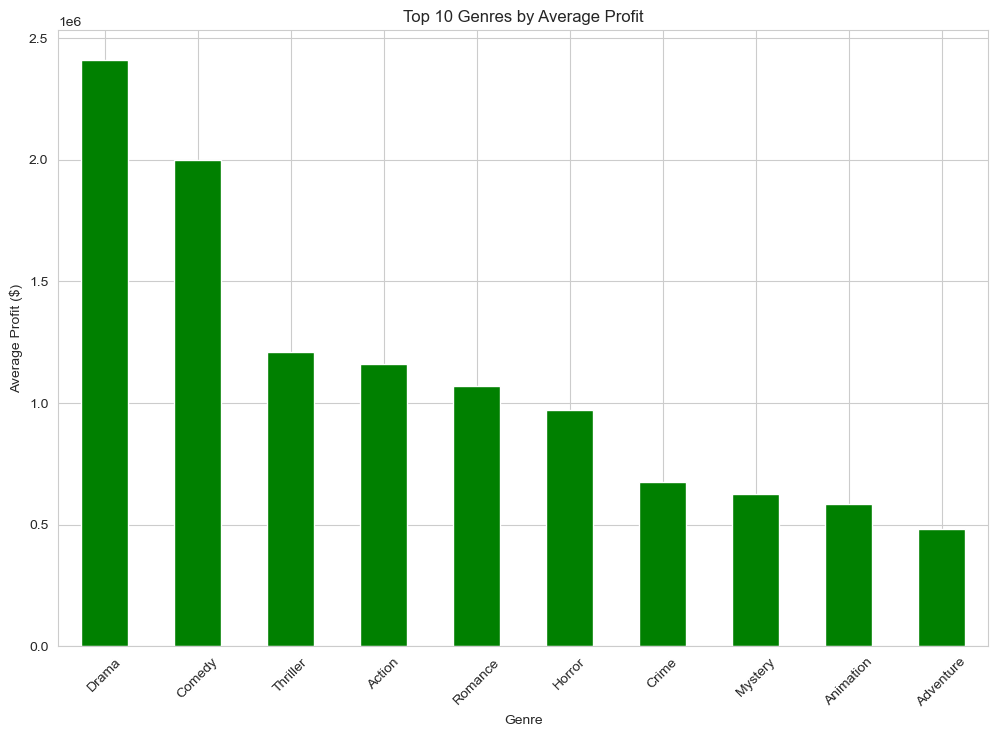

Top 10 Genres by Average Profit:
Drama        2.411668e+06
Comedy       1.999414e+06
Thriller     1.210074e+06
Action       1.159655e+06
Romance      1.071261e+06
Horror       9.719194e+05
Crime        6.737706e+05
Mystery      6.247139e+05
Animation    5.853938e+05
Adventure    4.841582e+05
dtype: float64


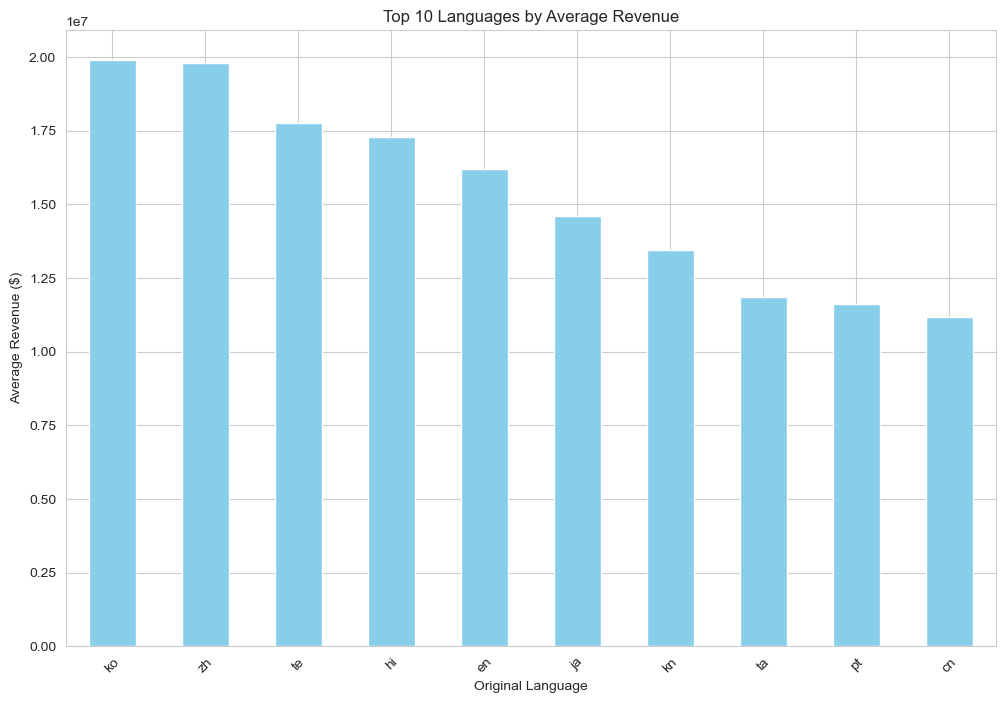

Top 10 Languages by Average Revenue:
original_language
ko    1.991623e+07
zh    1.981169e+07
te    1.777720e+07
hi    1.728582e+07
en    1.620240e+07
ja    1.459891e+07
kn    1.346022e+07
ta    1.185596e+07
pt    1.162032e+07
cn    1.116906e+07
Name: revenue, dtype: float64


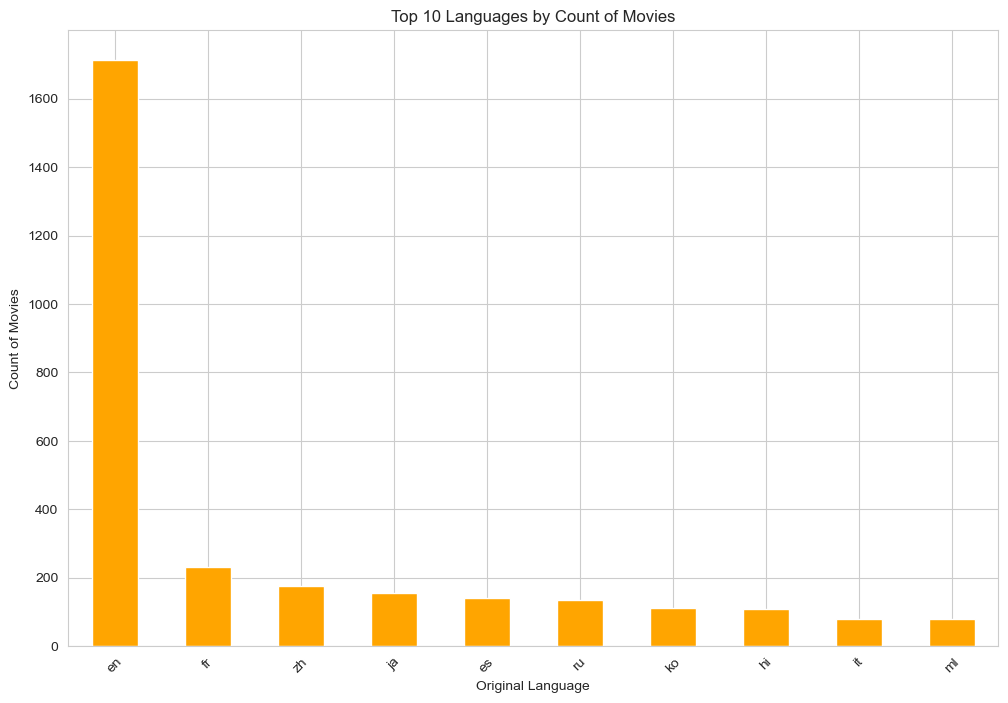

Top 10 Languages by Count of Movies:
en    1714
fr     233
zh     175
ja     155
es     141
ru     136
ko     112
hi     109
it      80
ml      79
Name: original_language, dtype: int64


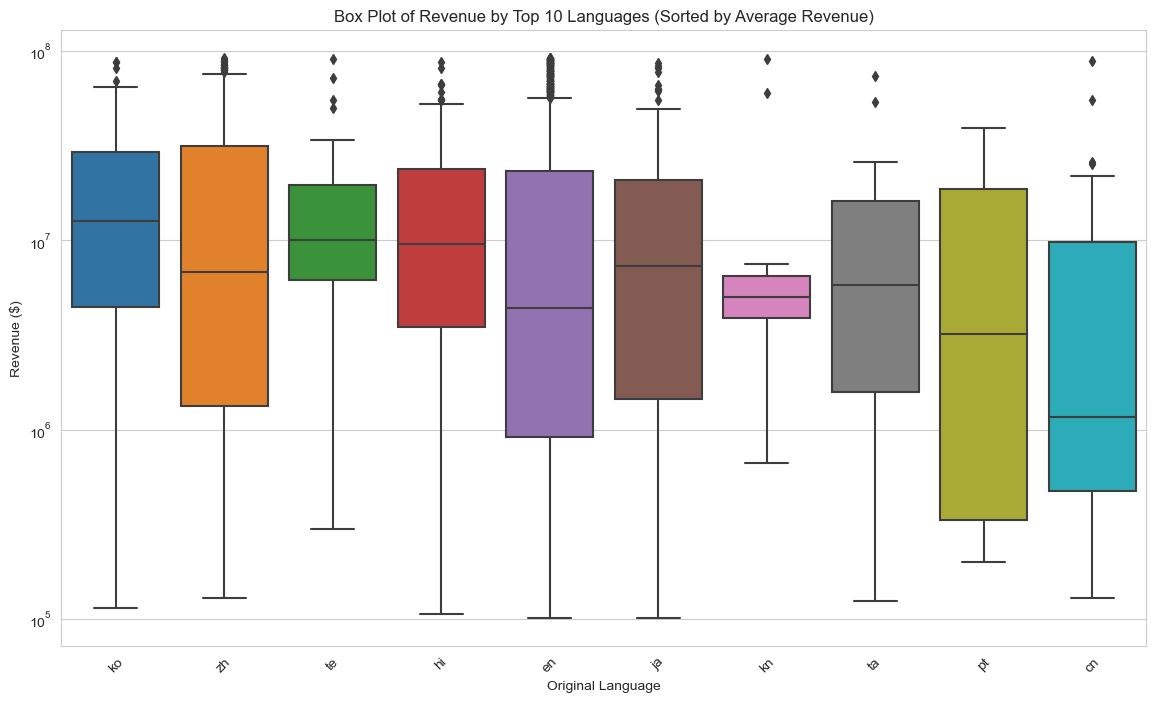

Number of English movies with low revenue (below median of $4418084.00): 857
                                    title  revenue
14                          Don't Look Up   791863
20                         Marriage Story  2300000
26                           The Irishman   968853
43                             Red Notice   178143
81                      Love and Monsters  1122066
...                                   ...      ...
3525                             Neighbor   221774
3528      Joji Presents: THE EXTRAVAGANZA  1000000
3529                        Miss Gangster   486842
3535  Grateful Dead - Giants Stadium 1991   537153
3536                       Blues for Life  2000000

[857 rows x 2 columns]
Number of Korean movies with low revenue (below median of $4418084.00): 28
                                                  title  revenue
1187                                      Seoul Station  2021735
1370                                         The Killer   595112
1668             

In [2]:



# Load the dataset
df = pd.read_csv(file_path)

# Setting general visualization aesthetics
sns.set_style('whitegrid')

# Filter the DataFrame to include only released movies with revenue > 0
df = df[(df['status'] == 'Released') & (df['revenue'] > 0)]
print(len(df))

# Calculate profit
df['profit'] = df['revenue'] - df['budget']

# Process genres
df_genres_expanded = df['genres'].str.get_dummies(sep=', ')
df_combined = pd.concat([df, df_genres_expanded], axis=1)

# Calculate average profit for each genre
genre_average_profit = df_genres_expanded.mul(df_combined['profit'], axis=0).mean().sort_values(ascending=False)

# Top 10 Genres by Average Profit
plt.figure(figsize=(12, 8))
top_10_genres = genre_average_profit.head(10)
top_10_genres.plot(kind='bar', color='green')
plt.title('Top 10 Genres by Average Profit')
plt.xlabel('Genre')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45)
plt.show()

# Displaying the top genres by average profit in the console
print("Top 10 Genres by Average Profit:")
print(top_10_genres)

# Average revenue by language
language_revenue = df.groupby('original_language')['revenue'].mean().sort_values(ascending=False)

# Top 10 Languages by Average Revenue
plt.figure(figsize=(12, 8))
top_10_languages = language_revenue.head(10)
top_10_languages.plot(kind='bar', color='skyblue')
plt.title('Top 10 Languages by Average Revenue')
plt.xlabel('Original Language')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.show()

# Displaying the top languages by average revenue in the console
print("Top 10 Languages by Average Revenue:")
print(top_10_languages)


# Count of movies created by language
language_counts = df['original_language'].value_counts()

# Top 10 Languages by Count of Movies
plt.figure(figsize=(12, 8))
top_10_languages_count = language_counts.head(10)
top_10_languages_count.plot(kind='bar', color='orange')
plt.title('Top 10 Languages by Count of Movies')
plt.xlabel('Original Language')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.show()

# Displaying the count of movies by language in the console
print("Top 10 Languages by Count of Movies:")
print(top_10_languages_count)

# Identify top 10 languages by average revenue for box plot
top_10_language_names = top_10_languages.index.tolist()

# Filter DataFrame for the top 10 languages
df_top_languages = df[df['original_language'].isin(top_10_language_names)]

# Calculate average revenue for sorting purposes
average_revenue_sorted = df_top_languages.groupby('original_language')['revenue'].mean().sort_values(ascending=False)

# Box plot of revenue by top 10 languages, sorted by average revenue
plt.figure(figsize=(14, 8))
sns.boxplot(x='original_language', y='revenue', data=df_top_languages, order=average_revenue_sorted.index)
plt.title('Box Plot of Revenue by Top 10 Languages (Sorted by Average Revenue)')
plt.xlabel('Original Language')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.yscale('log')  # Optional: use a logarithmic scale for better visibility of revenue distribution
plt.show()

# Filter for English movies
english_movies = df[df['original_language'] == 'en']
korean_movies = df[df['original_language'] == 'ko']

# Calculate the threshold for low revenue
# For this example, we will use the median revenue as the threshold
revenue_threshold = english_movies['revenue'].median()
revenue_threshold_ko = korean_movies['revenue'].median()

# Count the number of English movies below the revenue threshold
low_revenue_movies = english_movies[english_movies['revenue'] < revenue_threshold]
low_revenue_movies_ko = korean_movies[korean_movies['revenue'] < revenue_threshold]
number_of_low_revenue_movies = len(low_revenue_movies)
number_of_low_revenue_movies_ko = len(low_revenue_movies_ko)

# Display the results
print(f"Number of English movies with low revenue (below median of ${revenue_threshold:.2f}): {number_of_low_revenue_movies}")
print(low_revenue_movies[['title', 'revenue']])
print(f"Number of Korean movies with low revenue (below median of ${revenue_threshold:.2f}): {number_of_low_revenue_movies_ko}")
print(low_revenue_movies_ko[['title', 'revenue']])

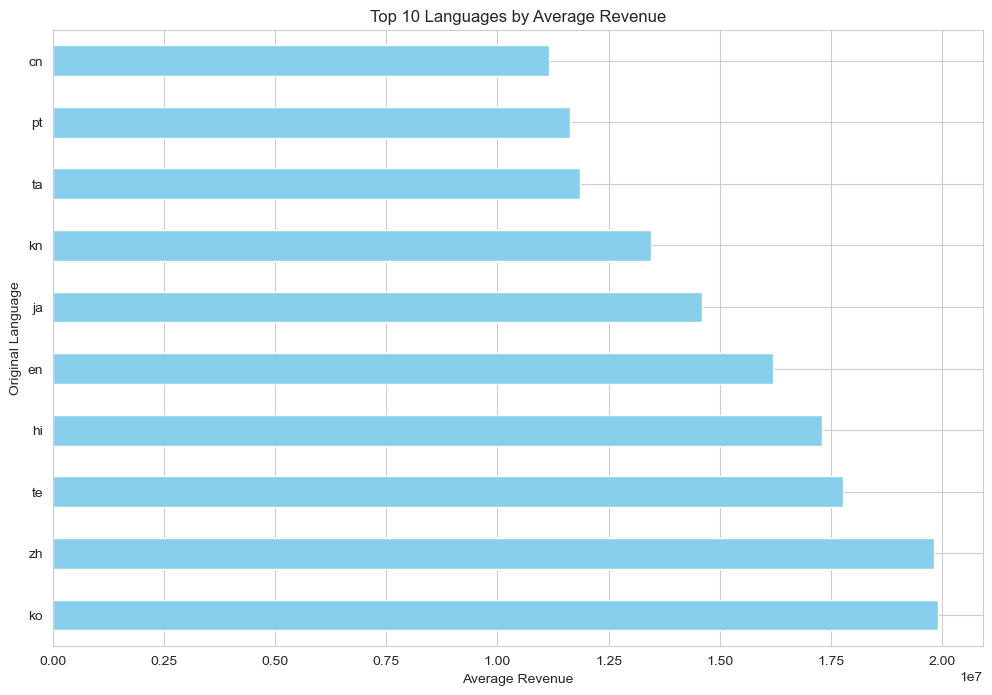

In [3]:
# 1. Calculate average revenue per language and sort by language name
language_revenue = df.groupby('original_language')['revenue'].mean().sort_index()

# Filter to the top 10 languages by average revenue
top_languages_revenue = language_revenue.nlargest(10)

# Plotting the average revenue by language (horizontal bar plot)
plt.figure(figsize=(12, 8))
top_languages_revenue.plot(kind='barh', color='skyblue')
plt.title('Top 10 Languages by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Original Language')
plt.show()

